In [5]:
import pandas as pd
import seaborn as sns
sns.set()

# Exploration constant c

New version has extra data columns in produced csv files, like:
* length of naive solution
* length of bfs solution
* maximum depth of the tree path
* mean depth of tree path

Run params: `./solver.py -e cube2x2 -m saves/cube2x2-zero-goal-d200-t1/best_1.4547e-02.dat --max-steps 30000 --cuda -o csvs/t3.1-c2x2-mcts-c=1000.csv`

In [4]:
!ls ../csvs/t3.1*

../csvs/t3.1-c2x2-mcts-c=10000.csv  ../csvs/t3.1-c2x2-mcts-c=10.csv
../csvs/t3.1-c2x2-mcts-c=1000.csv   ../csvs/t3.1-c2x2-mcts-c=1.csv
../csvs/t3.1-c2x2-mcts-c=100.csv


In [5]:
# combine data into single data frame
df = pd.concat({
#    'c=100000':  pd.read_csv("../csvs/t3.1-c2x2-mcts-c=100000.csv"),
    'c=10000':    pd.read_csv("../csvs/t3.1-c2x2-mcts-c=10000.csv"),
    'c=1000':     pd.read_csv("../csvs/t3.1-c2x2-mcts-c=1000.csv"),
    'c=100':      pd.read_csv("../csvs/t3.1-c2x2-mcts-c=100.csv"),
    'c=10':       pd.read_csv("../csvs/t3.1-c2x2-mcts-c=10.csv"),
    'c=1':        pd.read_csv("../csvs/t3.1-c2x2-mcts-c=1.csv"),
})
df.index.set_names(['param_c', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)

In [8]:
df.columns

Index(['param_c', 'start_dt', 'stop_dt', 'duration', 'depth', 'scramble',
       'is_solved', 'solve_steps', 'sol_len_naive', 'sol_len_bfs',
       'tree_depth_max', 'tree_depth_mean'],
      dtype='object')

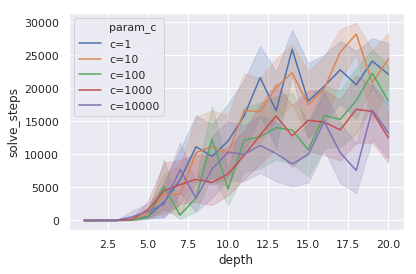

In [7]:
sns.lineplot('depth', 'solve_steps', data=df, hue='param_c');

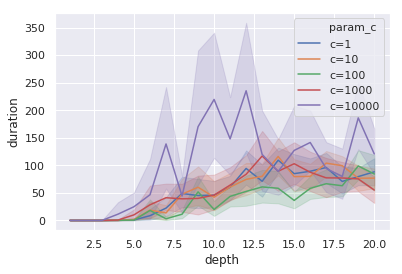

In [17]:
sns.lineplot('depth', 'duration', data=df, hue='param_c');

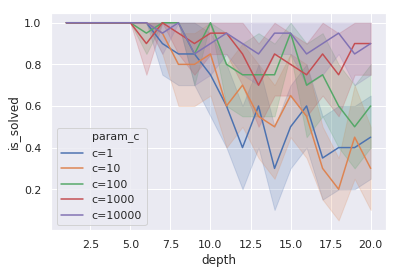

In [10]:
sns.lineplot('depth', 'is_solved', data=df, hue='param_c');

In [11]:
df.groupby('param_c').is_solved.mean()*100

param_c
c=1        69.75
c=10       71.00
c=100      84.75
c=1000     90.00
c=10000    93.75
Name: is_solved, dtype: float64

In [12]:
df[df.is_solved==1].groupby('param_c').solve_steps.mean()

param_c
c=1        4941.448029
c=10       5542.239437
c=100      5216.610619
c=1000     6201.063889
c=10000    5804.074667
Name: solve_steps, dtype: float64

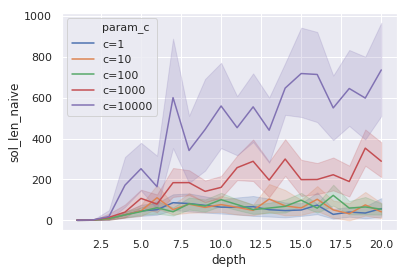

In [13]:
sns.lineplot('depth', 'sol_len_naive', data=df, hue='param_c')

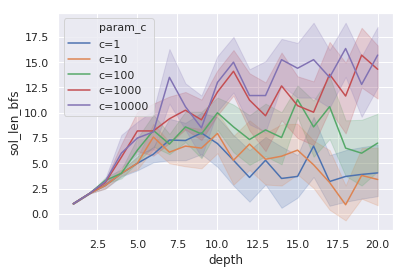

In [14]:
sns.lineplot('depth', 'sol_len_bfs', data=df, hue='param_c');

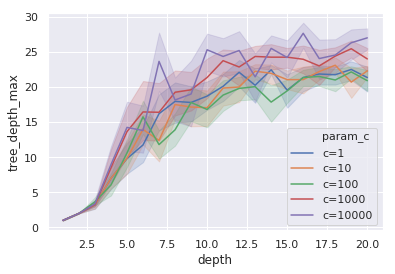

In [15]:
sns.lineplot('depth', 'tree_depth_max', data=df, hue='param_c');

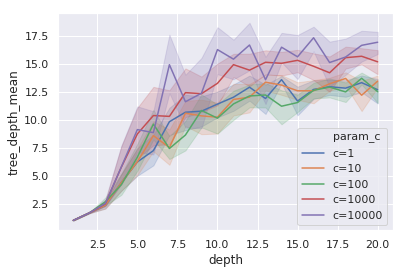

In [16]:
sns.lineplot('depth', 'tree_depth_mean', data=df, hue='param_c');

Try to compare quality of solutions with lower C, but more steps to be executed.

For instance, c=100, steps=100000

In [21]:
df_100_10k = df[df.param_c.isin(['c=100', 'c=10000'])]

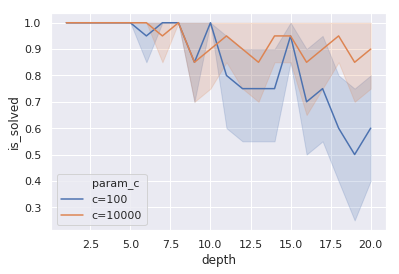

In [23]:
sns.lineplot('depth', 'is_solved', data=df_100_10k, hue='param_c');

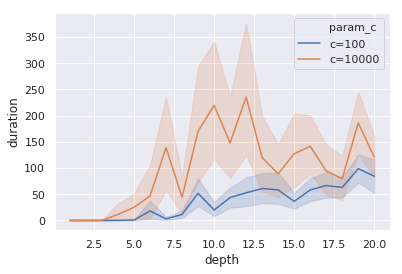

In [24]:
sns.lineplot('depth', 'duration', data=df_100_10k, hue='param_c');

In [28]:
!ls ../csvs/t3.1*

../csvs/t3.1-c2x2-mcts-c=10000.csv
../csvs/t3.1-c2x2-mcts-c=1000.csv
../csvs/t3.1-c2x2-mcts-c=100.csv
../csvs/t3.1-c2x2-mcts-c=100-steps=100k.csv
../csvs/t3.1-c2x2-mcts-c=100-steps=60k.csv
../csvs/t3.1-c2x2-mcts-c=10.csv
../csvs/t3.1-c2x2-mcts-c=1.csv


In [29]:
# combine data into single data frame
df_steps = pd.concat({
    'steps=30k':  pd.read_csv("../csvs/t3.1-c2x2-mcts-c=100.csv"),
    'steps=60k':  pd.read_csv("../csvs/t3.1-c2x2-mcts-c=100-steps=60k.csv"),
    'steps=100k': pd.read_csv("../csvs/t3.1-c2x2-mcts-c=100-steps=100k.csv"),
})
df_steps.index.set_names(['steps', 'idx'], inplace=True)
df_steps.reset_index(level=0, inplace=True)

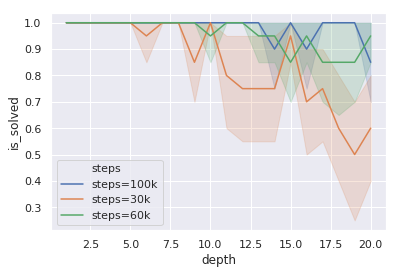

In [31]:
sns.lineplot('depth', 'is_solved', data=df_steps, hue='steps');

So, by giving more time we can greatly improve solution ratio

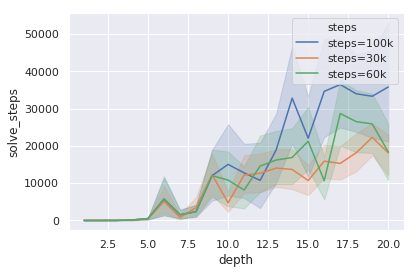

In [32]:
sns.lineplot('depth', 'solve_steps', data=df_steps, hue='steps');

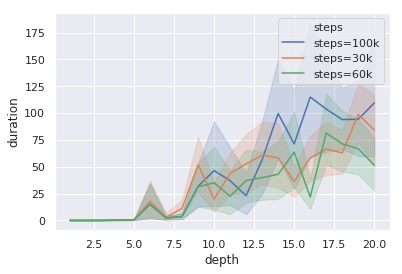

In [33]:
sns.lineplot('depth', 'duration', data=df_steps, hue='steps');

Compare best performer with c=100 (100k steps) with best performer with c=10k

In [35]:
!ls ../csvs/t3.1*

../csvs/t3.1-c2x2-mcts-c=10000.csv
../csvs/t3.1-c2x2-mcts-c=1000.csv
../csvs/t3.1-c2x2-mcts-c=100.csv
../csvs/t3.1-c2x2-mcts-c=100-steps=100k.csv
../csvs/t3.1-c2x2-mcts-c=100-steps=60k.csv
../csvs/t3.1-c2x2-mcts-c=10.csv
../csvs/t3.1-c2x2-mcts-c=1.csv


In [36]:
# combine data into single data frame
df_vs = pd.concat({
    'c=10k': pd.read_csv("../csvs/t3.1-c2x2-mcts-c=10000.csv"),
    'c=100': pd.read_csv("../csvs/t3.1-c2x2-mcts-c=100-steps=100k.csv"),
})
df_vs.index.set_names(['param_c', 'idx'], inplace=True)
df_vs.reset_index(level=0, inplace=True)

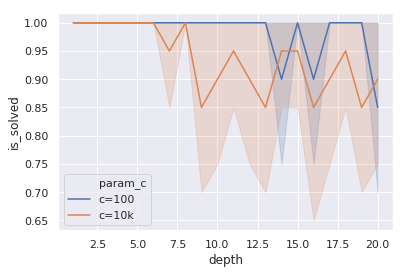

In [38]:
sns.lineplot('depth', 'is_solved', data=df_vs, hue='param_c');

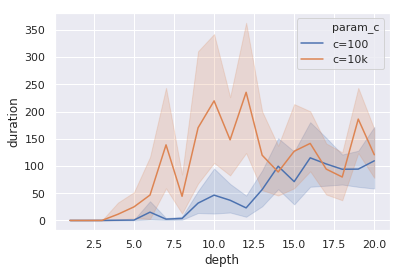

In [39]:
sns.lineplot('depth', 'duration', data=df_vs, hue='param_c');

So, smaller c given more steps finds solution more frequently and faster. Check solutions

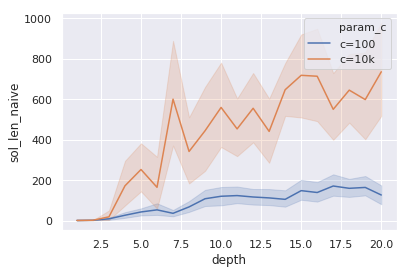

In [40]:
sns.lineplot('depth', 'sol_len_naive', data=df_vs, hue='param_c');

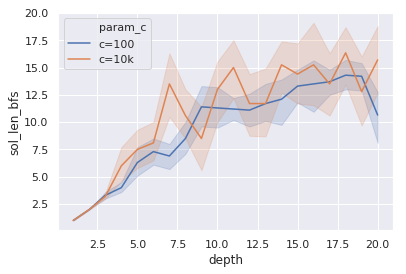

In [41]:
sns.lineplot('depth', 'sol_len_bfs', data=df_vs, hue='param_c');

In [42]:
df_vs.columns

Index(['param_c', 'start_dt', 'stop_dt', 'duration', 'depth', 'scramble',
       'is_solved', 'solve_steps', 'sol_len_naive', 'sol_len_bfs',
       'tree_depth_max', 'tree_depth_mean'],
      dtype='object')

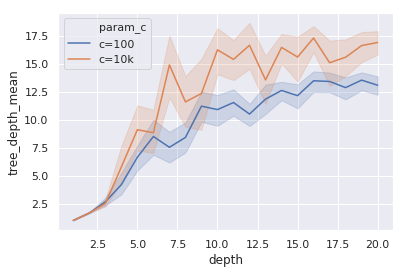

In [44]:
sns.lineplot('depth', 'tree_depth_mean', data=df_vs, hue='param_c');

Final conclusion: c=100 is better (but it needs more steps). Next step: conduct the same experiment with c=10, but more steps (say, 1m)

## The same comparison but with c=10

In [6]:
!ls ../csvs/t3.1*

../csvs/t3.1-c2x2-mcts-c=10000.csv
../csvs/t3.1-c2x2-mcts-c=1000.csv
../csvs/t3.1-c2x2-mcts-c=100.csv
../csvs/t3.1-c2x2-mcts-c=100-steps=100k.csv
../csvs/t3.1-c2x2-mcts-c=100-steps=60k.csv
../csvs/t3.1-c2x2-mcts-c=10.csv
../csvs/t3.1-c2x2-mcts-c=1.csv


In [4]:
!ls ../csvs/t4*

../csvs/t4-c2x2-mcts-c=100-steps=100k-b100.csv
../csvs/t4-c2x2-mcts-c=100-steps=100k-b10.csv
../csvs/t4-c2x2-mcts-c=100-steps=100k.csv
../csvs/t4-c2x2-mcts-c=10-steps=100k.csv
../csvs/t4-c2x2-mcts-c=10-steps=200k.csv
../csvs/t4-c2x2-mcts-c=10-steps=500k.csv


In [7]:
df = pd.concat({
    'steps=30k':  pd.read_csv("../csvs/t3.1-c2x2-mcts-c=10.csv"),
    'steps=100k': pd.read_csv("../csvs/t4-c2x2-mcts-c=10-steps=100k.csv"),
    'steps=200k': pd.read_csv("../csvs/t4-c2x2-mcts-c=10-steps=200k.csv"),
    'steps=500k': pd.read_csv("../csvs/t4-c2x2-mcts-c=10-steps=500k.csv"),
})
df.index.set_names(['steps', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)

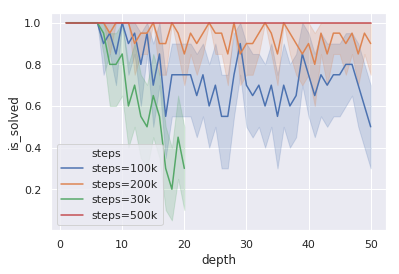

In [10]:
sns.lineplot('depth', 'is_solved', data=df, hue='steps');

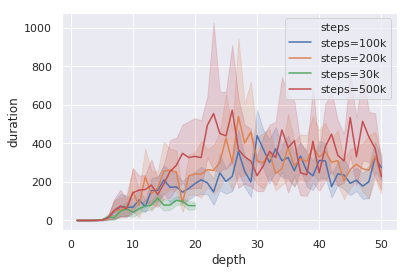

In [11]:
sns.lineplot('depth', 'duration', data=df, hue='steps');

Compare c=10-steps=500k and c=100-steps=100k

In [19]:
df = pd.concat({
    'c=10':  pd.read_csv("../csvs/t4-c2x2-mcts-c=10-steps=500k.csv"),
    'c=100': pd.read_csv("../csvs/t4-c2x2-mcts-c=100-steps=100k.csv"),
})
df.index.set_names(['param_c', 'idx'], inplace=True)
df.reset_index(level=0, inplace=True)
df['speed'] = df.solve_steps/df.duration

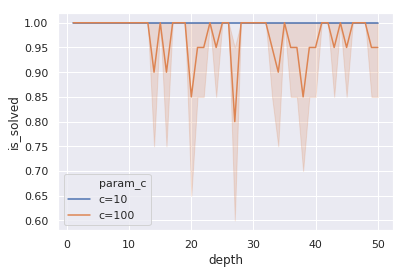

In [13]:
sns.lineplot('depth', 'is_solved', data=df, hue='param_c');

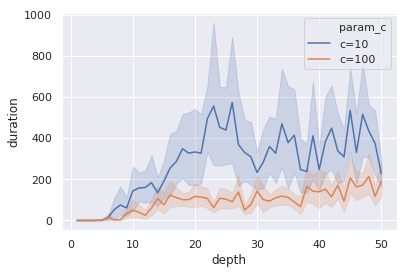

In [14]:
sns.lineplot('depth', 'duration', data=df, hue='param_c');

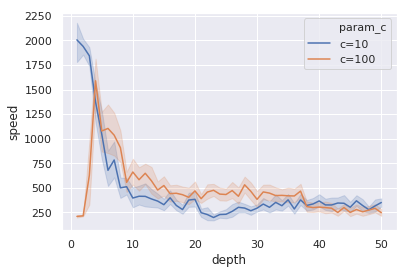

In [20]:
sns.lineplot('depth', 'speed', data=df, hue='param_c');

Looks like time decreases for significantly large C, in areas 10 and 100, it is almost the same